In [94]:
import requests
import pandas as pd
import seaborn


seaborn.set_context("paper")
seaborn.set(rc={'figure.figsize':(11.7,8.27)})

## Get single item

In [53]:
item_id = '2589'
url     = f'https://api.nexushub.co/wow-classic/v1/item/{item_id}'

r = requests.get(url)
r.json()

{'itemId': 2589,
 'name': 'Linen Cloth',
 'uniqueName': 'linen-cloth',
 'icon': 'https://wow.zamimg.com/images/wow/icons/large/inv_fabric_linen_01.jpg',
 'tags': ['Common', 'Trade Goods'],
 'requiredLevel': 0,
 'itemLevel': 5,
 'sellPrice': 13,
 'vendorPrice': None,
 'tooltip': [{'label': 'Linen Cloth', 'format': 'Common'},
  {'label': 'Item Level 5', 'format': 'Misc'},
  {'label': 'Max Stack: 20'},
  {'label': 'Sell Price:'}],
 'itemLink': '|cffffffff|Hitem:2589::::::::::0|h[Linen Cloth]|h|r'}

In [96]:
server  = 'earthfury-alliance'
item_id = '2589'
timerange = 14
url     = f'https://api.nexushub.co/wow-classic/v1/items/{server}/{item_id}/prices?timerange={timerange}'

print(url)
r = requests.get(url)
r.json()

https://api.nexushub.co/wow-classic/v1/items/earthfury-alliance/2589/prices?timerange=14


{'slug': 'earthfury-alliance',
 'itemId': 2589,
 'name': 'Linen Cloth',
 'uniqueName': 'linen-cloth',
 'timerange': 14,
 'data': [{'marketValue': 74,
   'minBuyout': 74,
   'quantity': 490,
   'scannedAt': '2020-04-28T00:27:14.000Z'},
  {'marketValue': 74,
   'minBuyout': 73,
   'quantity': 333,
   'scannedAt': '2020-04-28T01:24:46.000Z'},
  {'marketValue': 50,
   'minBuyout': 50,
   'quantity': 758,
   'scannedAt': '2020-04-28T02:07:05.000Z'},
  {'marketValue': 46,
   'minBuyout': 46,
   'quantity': 653,
   'scannedAt': '2020-04-28T04:04:40.000Z'},
  {'marketValue': 46,
   'minBuyout': 44,
   'quantity': 642,
   'scannedAt': '2020-04-28T05:12:09.000Z'},
  {'marketValue': 45,
   'minBuyout': 42,
   'quantity': 773,
   'scannedAt': '2020-04-28T06:19:57.000Z'},
  {'marketValue': 56,
   'minBuyout': 46,
   'quantity': 653,
   'scannedAt': '2020-04-28T07:22:27.000Z'},
  {'marketValue': 76,
   'minBuyout': 65,
   'quantity': 330,
   'scannedAt': '2020-04-28T10:21:22.000Z'},
  {'marketValue'

## Extract Data into Pandas

In [79]:
df = pd.DataFrame(r.json()['data'])
df.head()

,marketValue,minBuyout,quantity,scannedAt
0,74,74,490,2020-04-28T00:27:14.000Z
1,74,73,333,2020-04-28T01:24:46.000Z
2,50,50,758,2020-04-28T02:07:05.000Z
3,46,46,653,2020-04-28T04:04:40.000Z
4,46,44,642,2020-04-28T05:12:09.000Z


In [80]:
df.dtypes

marketValue     int64
minBuyout       int64
quantity        int64
scannedAt      object
dtype: object

In [100]:
# convert column to datetime
df['scannedAt'] = pd.to_datetime(df['scannedAt'])
df.dtypes

marketValue                  int64
minBuyout                    int64
quantity                     int64
scannedAt      datetime64[ns, UTC]
dtype: object

## Plot Common Mats

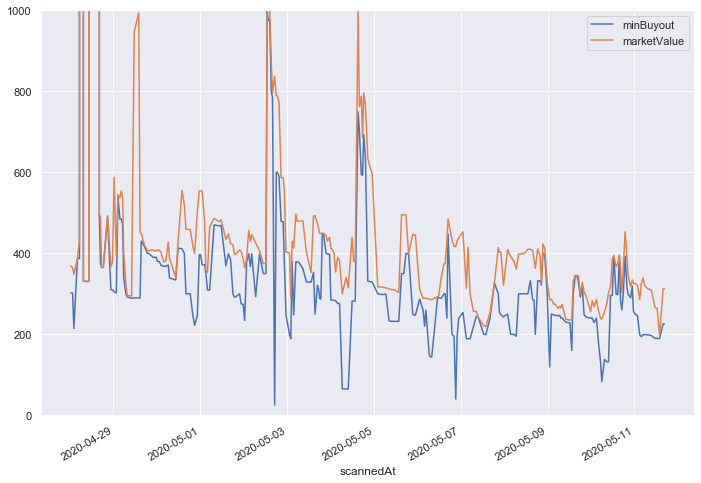

In [98]:
def show(item, timerange=14, ymax=1000):
    url = f'https://api.nexushub.co/wow-classic/v1/items/earthfury-alliance/{item}/prices?timerange={timerange}'
    r = requests.get(url)
    df = pd.DataFrame(r.json()['data'])
    df['scannedAt'] = pd.to_datetime(df['scannedAt'])
    df.plot(x='scannedAt', y=['minBuyout','marketValue'], ylim=[0,ymax])
    
copper_ore = 2770
show(copper_ore)

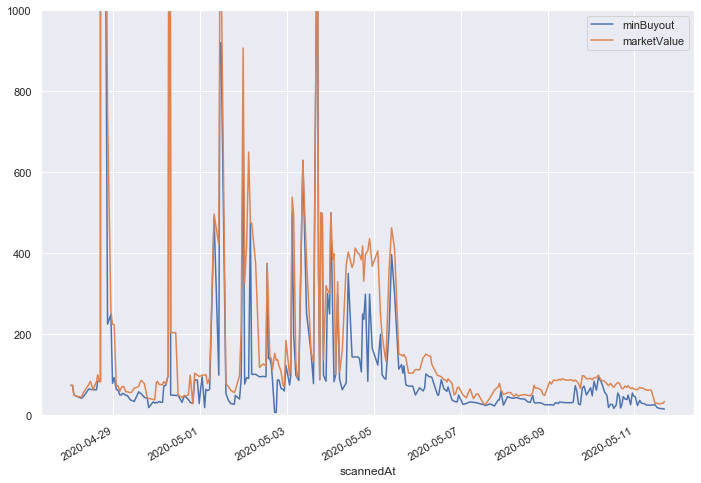

In [101]:
linen_cloth = 2589
show(linen_cloth)